In [2]:
# Autoreload all modules
%load_ext autoreload
%autoreload 2

import numpy as np
import jax.numpy as jnp
import jax.random as jr
import pylab as plt

# add ../mcjax to the path
import sys
sys.path.append('../')

from mcjax.dist.gaussian import IsotropicGauss, DiagGauss, Gauss



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# initialize jax RNG
key = jr.PRNGKey(0)

### Isotropic Gaussian

In [3]:
# create an isotropic Gaussian
dim = 2
mu = np.zeros(dim)
sigma = 3.
log_var = jnp.log(sigma**2)
dist = IsotropicGauss(mu=mu, log_var=log_var)

Empirical mean: [0.03097183 0.00055891]
Empirical std: [3.0274687 3.029106 ]


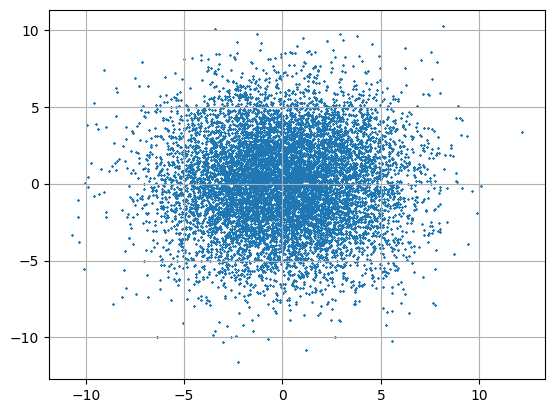

In [4]:
key, key_ = jr.split(key)
n_samples = 10_000
samples = dist.sample(key=key_, n_samples=n_samples)

# plot scatter plot of samples
plt.scatter(samples[:, 0], samples[:, 1], s=1, marker='x')
plt.grid()

# empirical mean and variance
mean = jnp.mean(samples, axis=0)
var = jnp.var(samples, axis=0)
print(f"Empirical mean: {mean}")
print(f"Empirical std: {jnp.sqrt(var)}")

### Diagonal covariance

Empirical mean: [-0.0041753   0.00351992]
Empirical std: [0.994047  1.9997904]


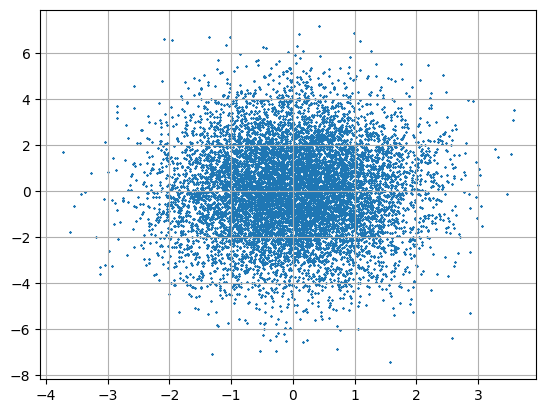

In [5]:
std_arr = jnp.array([1.,2.])
var_arr = std_arr**2
log_var = jnp.log(var_arr)
dist = DiagGauss(mu=mu, log_var=log_var)

key, key_ = jr.split(key)
n_samples = 10_000
samples = dist.sample(key=key_, n_samples=n_samples)

# plot scatter plot of samples
plt.scatter(samples[:, 0], samples[:, 1], s=1, marker='x')

# empirical mean and variance
mean = jnp.mean(samples, axis=0)
var = jnp.var(samples, axis=0)
print(f"Empirical mean: {mean}")
print(f"Empirical std: {jnp.sqrt(var)}")
plt.grid()

### General Gaussian

In [6]:
M = np.random.normal(0,1, (dim, dim))
mu = np.random.normal(0,1, dim)
cov = M @ M.T
dist = Gauss(mu=mu, cov=cov)

Empirical mean: [-0.12428472 -0.2628882 ]
Empirical cov: 
 [[0.6673799 0.9430261]
 [0.9430261 3.1658564]]
Theoretical cov: 
 [[0.66846306 0.93676465]
 [0.93676465 3.13484429]]


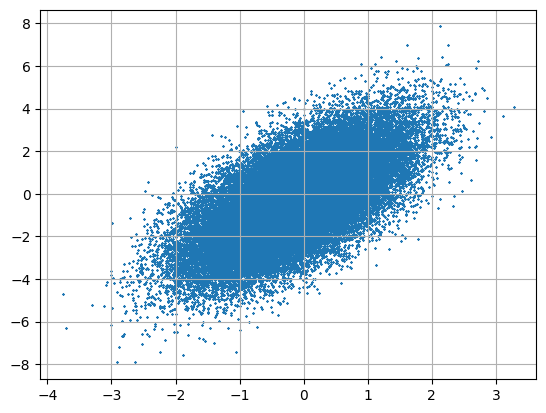

In [7]:
key, key_ = jr.split(key)
n_samples = 50_000
samples = dist.sample(key=key_, n_samples=n_samples)

# plot scatter plot of samples
plt.scatter(samples[:, 0], samples[:, 1], s=1, marker='x')
plt.grid()

# empirical mean and variance
mean = jnp.mean(samples, axis=0)
# covariance matrix
C = jnp.cov(samples.T)
print(f"Empirical mean: {mean}")
print(f"Empirical cov: \n {C}")
print(f"Theoretical cov: \n {cov}")